<a href="https://colab.research.google.com/github/mg253a/IA-aumentada-previsi-n-de-atrasos-de-vuelos/blob/main/Optimizacion_aeroportuaria_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

datos = pd.read_csv('/content/flights.csv')
datos.shape

(71175, 11)

In [26]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [27]:
round(.2*60)

12

In [28]:
round(.88*60)

53

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [30]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [31]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


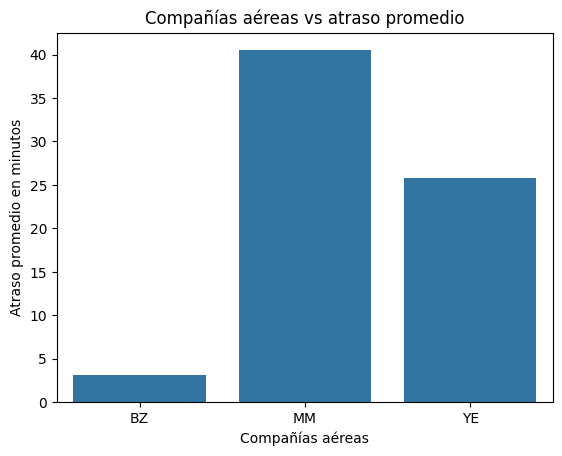

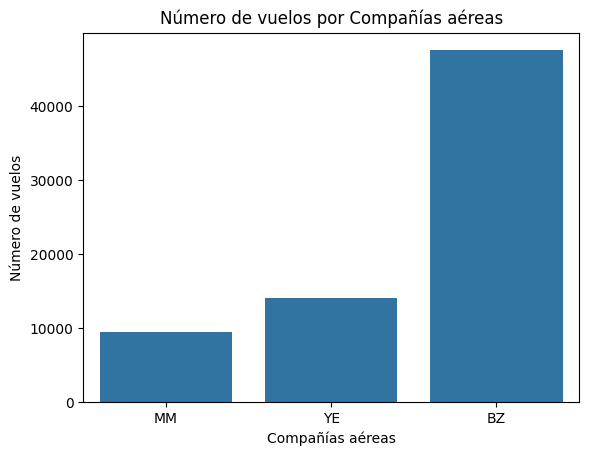

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañías aéreas')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por Compañías aéreas')
plt.xlabel('Compañías aéreas')
plt.ylabel('Número de vuelos')
plt.show()

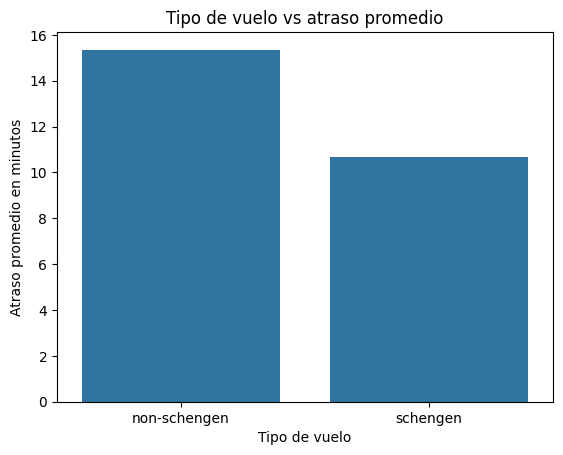

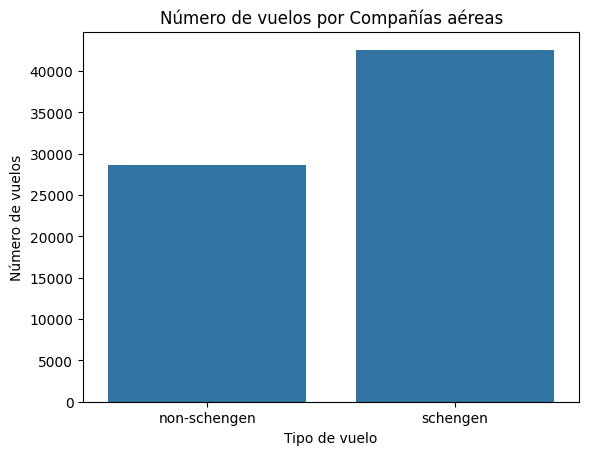

In [33]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Compañías aéreas')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

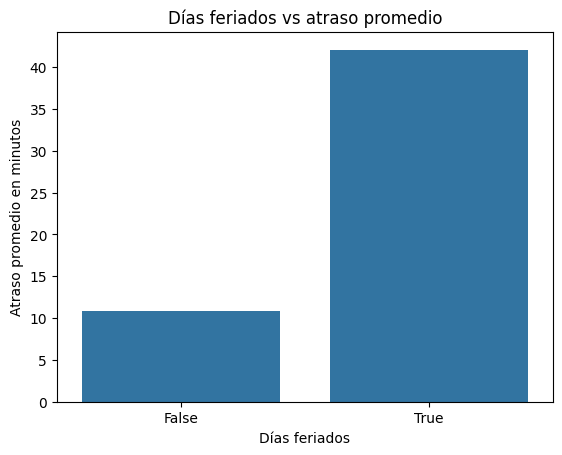

In [34]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [35]:
datos['aircraft_type'].value_counts()#.index
#'Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175','Boeing 737', 'Boeing 777'

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


In [36]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

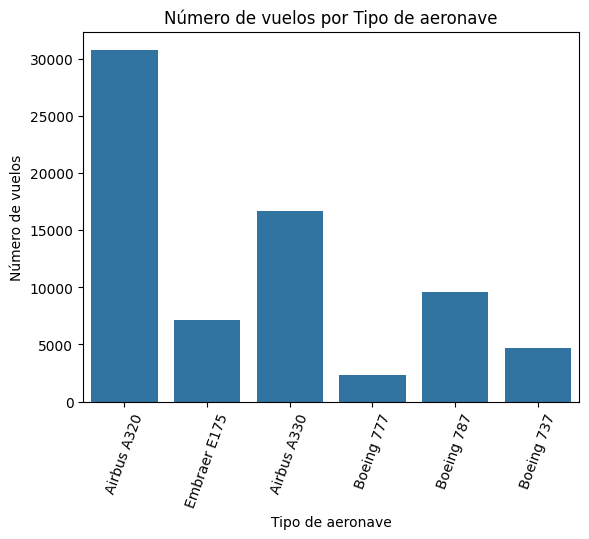

In [37]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type')
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

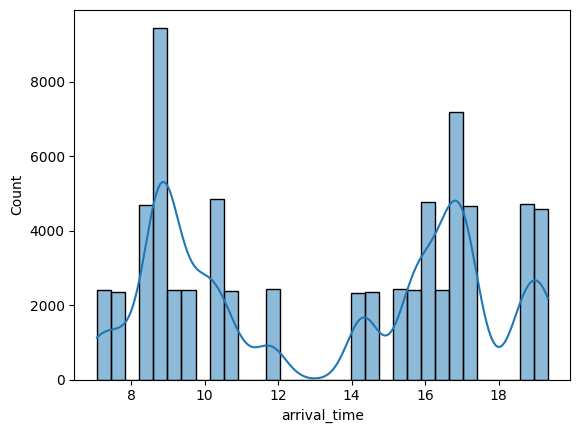

In [38]:
sns.histplot(data=datos, x='arrival_time',kde=True)

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

In [39]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

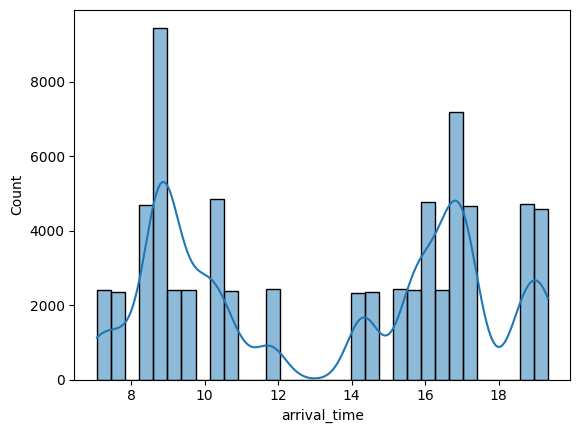

In [40]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time',kde=True, binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

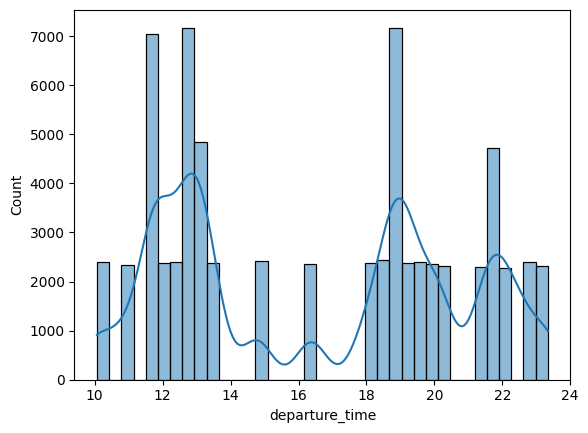

In [41]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time',kde=True, binwidth=binwidth)

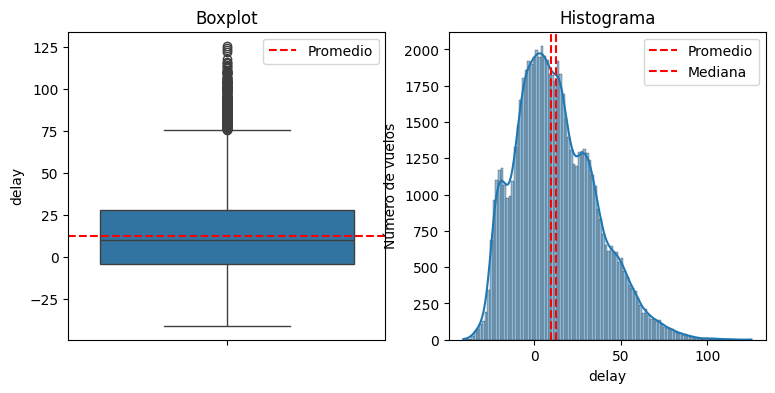

In [43]:
atraso_promedio =datos['delay'].mean()
atraso_mediana =datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label = 'Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label = 'Promedio')
ax[1].axvline(x=atraso_mediana, color='r', linestyle='--', label = 'Mediana')
ax[1].legend()

plt.tight_layout

plt.show()